<a href="https://colab.research.google.com/github/stacyshen/ITP449-EDA-Project/blob/main/ITP_449_EDA_Obesity_Levels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Medium post: https://stacyy.medium.com/itp-449-exploratory-data-analysis-project-obesity-levels-based-on-eating-habits-and-physical-82fa10775c2e

Github repo: https://github.com/stacyshen/ITP449-EDA-Project

CSV file download: https://drive.google.com/file/d/1Na6MGE3AWpR8uR3pnHjHUaMzpCI0DTfr/view?usp=sharing

In [2]:
#Import libraries necessary for data analysis
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Upload dataset
from google.colab import files
uploaded = files.upload()

Saving ObesityDataSet.csv to ObesityDataSet.csv


In [3]:
#Load data into dataframe df and print first five datapoints to check accuracy before continuing
data=pd.read_csv("ObesityDataSet.csv")
data.head()


,Gender,Age,Height,Weight,family_history,FCHCF,FCV,NMM,CFBM,Smoke,CW,CCM,PAF,TUT,CA,Transportation,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public Transportation,Normal Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public Transportation,Normal Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Level I Overweight
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public Transportation,Level II Overweight


In [4]:
#Create a table, tab, from this dataframe; check table
tab = pd.DataFrame(data)
print(tab)

      Gender        Age  ...         Transportation              Obesity
0     Female  21.000000  ...  Public Transportation        Normal Weight
1     Female  21.000000  ...  Public Transportation        Normal Weight
2       Male  23.000000  ...  Public Transportation        Normal Weight
3       Male  27.000000  ...                Walking   Level I Overweight
4       Male  22.000000  ...  Public Transportation  Level II Overweight
...      ...        ...  ...                    ...                  ...
2106  Female  20.976842  ...  Public Transportation     Type III Obesity
2107  Female  21.982942  ...  Public Transportation     Type III Obesity
2108  Female  22.524036  ...  Public Transportation     Type III Obesity
2109  Female  24.361936  ...  Public Transportation     Type III Obesity
2110  Female  23.664709  ...  Public Transportation     Type III Obesity

[2111 rows x 17 columns]


In [5]:
#Body fat classification is determined by body mass index (BMI), so I calculated BMI and added each individual's BMI as a new column
data['BMI'] = data['Weight']/(data['Height']**2)

#Reorder columns to put BMI immediately after Height and Weight
data = data[['Gender', 'Age', 'Height', 'Weight','BMI','family_history','FCHCF','FCV','NMM','CFBM','Smoke','CW','CCM', 'PAF','TUT','CA','Transportation','Obesity']]

#Check if the new column was calculated and placed correctly
data.head()

,Gender,Age,Height,Weight,BMI,family_history,FCHCF,FCV,NMM,CFBM,Smoke,CW,CCM,PAF,TUT,CA,Transportation,Obesity
0,Female,21.0,1.62,64.0,24.386526,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public Transportation,Normal Weight
1,Female,21.0,1.52,56.0,24.238227,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,1.80,77.0,23.765432,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public Transportation,Normal Weight
3,Male,27.0,1.80,87.0,26.851852,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Level I Overweight
4,Male,22.0,1.78,89.8,28.342381,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public Transportation,Level II Overweight


In [6]:
# Returns the array dimensions
data.shape


(2111, 18)

In [7]:
#Check how many duplicate rows there are
dup_data = data[data.duplicated()]
print(dup_data.shape)

(24, 18)


In [8]:
#Drop duplicates
df = data.drop_duplicates(keep='last')
df.shape

(2087, 18)

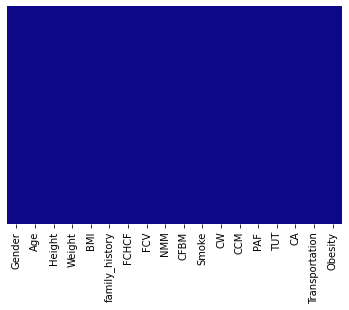

In [9]:
#Check if there are any missing values
sn.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='plasma')

In [ ]:
#Summarize dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2087 non-null   object 
 1   Age             2087 non-null   float64
 2   Height          2087 non-null   float64
 3   Weight          2087 non-null   float64
 4   BMI             2087 non-null   float64
 5   family_history  2087 non-null   object 
 6   FCHCF           2087 non-null   object 
 7   FCV             2087 non-null   float64
 8   NMM             2087 non-null   float64
 9   CFBM            2087 non-null   object 
 10  Smoke           2087 non-null   object 
 11  CW              2087 non-null   float64
 12  CCM             2087 non-null   object 
 13  PAF             2087 non-null   float64
 14  TUT             2087 non-null   float64
 15  CA              2087 non-null   object 
 16  Transportation  2087 non-null   object 
 17  Obesity         2087 non-null   o

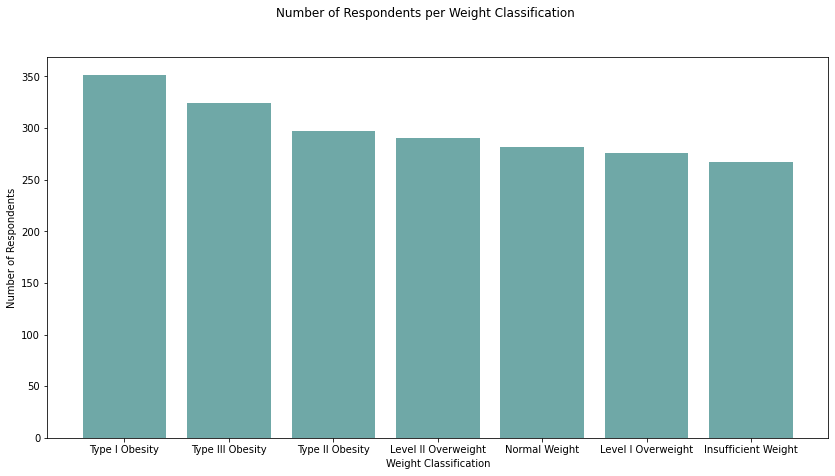

In [10]:
# Graph #1: Weight classification count
fig = plt.figure(figsize = (14, 7))
fig.suptitle("Number of Respondents per Weight Classification")

#Count the number of datapoints attributed with each weight category
counts = df["Obesity"].value_counts()
plt.bar(counts.index, counts.values, color="#6fa8a7")
plt.xlabel("Weight Classification")
plt.ylabel("Number of Respondents")
plt.show()

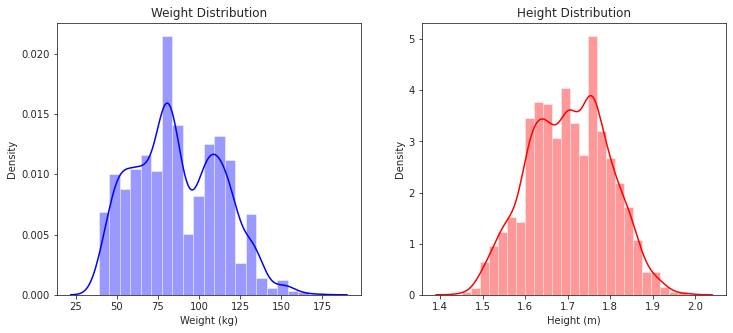

In [ ]:
#Graphs 2-3: Height and Weight Dist of Respondents
plt.figure(figsize=(12,5))

#Weight distributon suplot
plt.subplot(1, 2, 1)
sn.distplot(df["Weight"], color="b").set_title('Weight Distribution')
plt.xlabel("Weight (kg)")

#Height distribution subplot
plt.subplot(1, 2, 2)
sn.distplot(df["Height"], color="r").set_title('Height Distribution')
plt.xlabel("Height (m)")

plt.show()

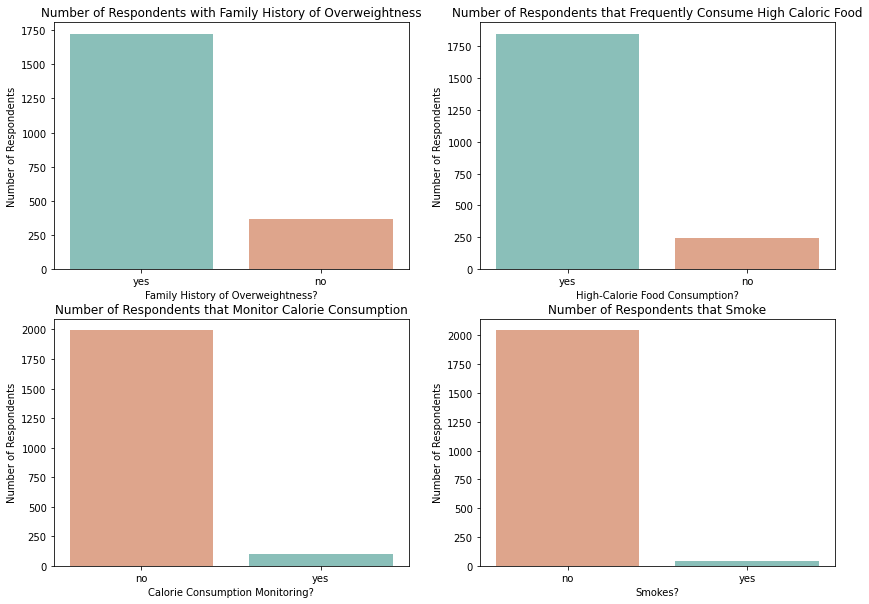

In [14]:
#Graphs 4-7: Breakdown of how respondents answered yes/no questions
plt.figure(figsize=(14,10))

#Subplot regarding family history
plt.subplot(2, 2, 1)
plt.title("Number of Respondents with Family History of Overweightness")
counts = df["family_history"].value_counts()
plt.bar(counts.index, counts.values, color = ['#8abfb9', '#dea58c'])
plt.xlabel("Family History of Overweightness?")
plt.ylabel("Number of Respondents")

#Subplot regarding consumption of high caloric food
plt.subplot(2, 2, 2)
plt.title("Number of Respondents that Frequently Consume High Caloric Food")
counts = df["FCHCF"].value_counts()
plt.bar(counts.index, counts.values, color = ['#8abfb9', '#dea58c'])
plt.xlabel("High-Calorie Food Consumption?")
plt.ylabel("Number of Respondents")

#Subplot regarding calorie monitoring
plt.subplot(2, 2, 3)
plt.title("Number of Respondents that Monitor Calorie Consumption")
counts = df["CCM"].value_counts()
plt.bar(counts.index, counts.values, color = ['#dea58c','#8abfb9'])
plt.xlabel("Calorie Consumption Monitoring?")
plt.ylabel("Number of Respondents")

#Subplot regarding smoking
plt.subplot(2, 2, 4)
plt.title("Number of Respondents that Smoke")
counts = df["Smoke"].value_counts()
plt.bar(counts.index, counts.values, color = ['#dea58c','#8abfb9'])
plt.xlabel("Smokes?")
plt.ylabel("Number of Respondents")
plt.show()

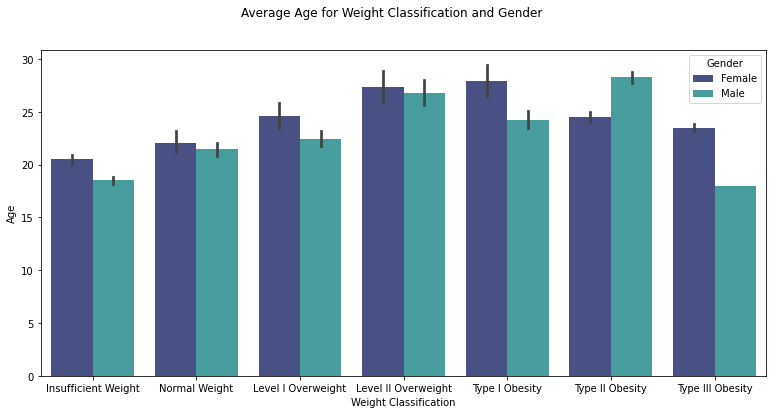

In [13]:
#Graph 8: Average age by weight classification, split by gender
fig = plt.figure(figsize = (13, 6))
fig.suptitle("Average Age for Weight Classification and Gender")
sn.barplot(x=df.Obesity,y=df.Age, hue = df.Gender, palette = "mako", order=["Insufficient Weight", "Normal Weight", "Level I Overweight", "Level II Overweight","Type I Obesity", "Type II Obesity", "Type III Obesity"])
plt.xlabel("Weight Classification")
plt.ylabel("Age")
plt.show()



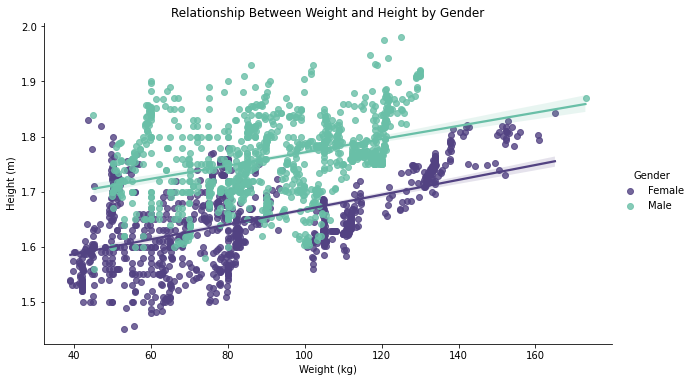

In [12]:
#Graph 9: Weight and height by gender
sn.lmplot(x="Weight", y="Height", hue="Gender", data=df,  
          palette=dict(Female="#524282", Male="#69bfa7"), height=5, aspect=1.7, x_jitter=.1)
plt.title('Relationship Between Weight and Height by Gender')
plt.xlabel("Weight (kg)")
plt.ylabel("Height (m)")
plt.show()


Text(0.5, 0, 'Weight Category')

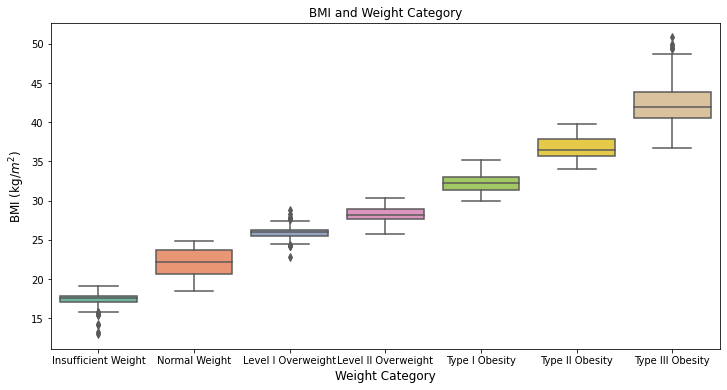

In [11]:
#Graph 10: BMI dist by weight category
plt.figure(figsize=(12,6))
sn.boxplot(x = 'Obesity', y = 'BMI',  
           order=["Insufficient Weight","Normal Weight","Level I Overweight","Level II Overweight", "Type I Obesity", "Type II Obesity", 'Type III Obesity'], 
           data = df, palette = "Set2").set_title('BMI and Weight Category')
plt.ylabel("BMI (kg/$m^2$)", size=12)
plt.xlabel("Weight Category", size=12)

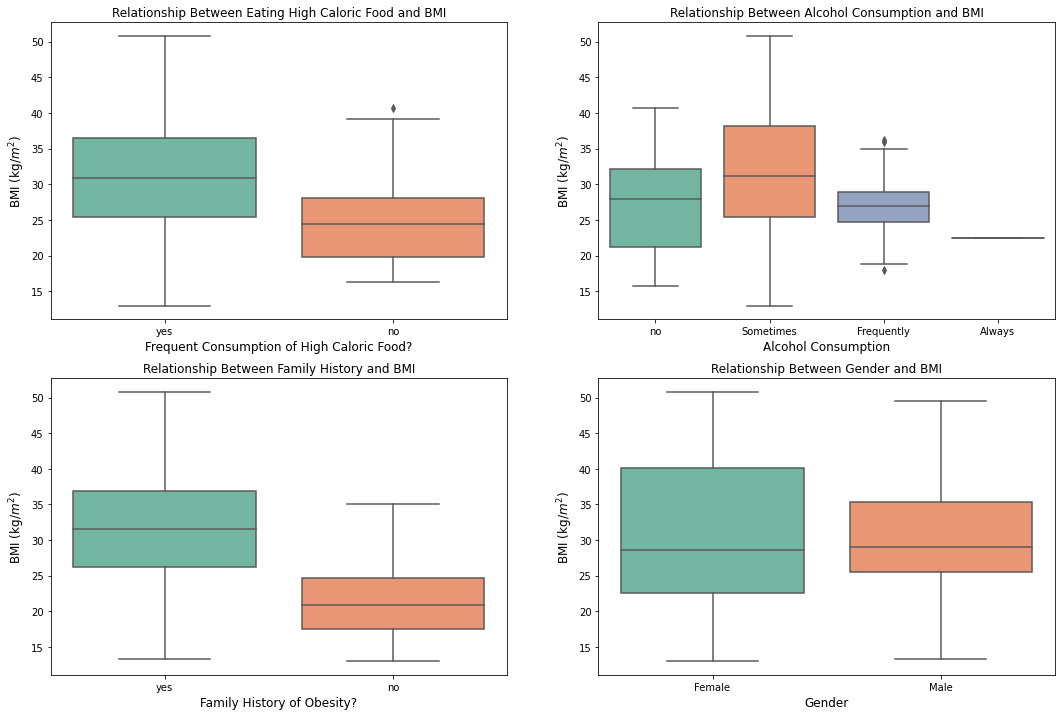

In [15]:
#Graphs 11-14: Relationship bewteen factors and BMI

plt.figure(figsize=(18,12))

#subplot 1: high caloric food 
plt.subplot(2, 2, 1)
sn.boxplot(x = 'FCHCF', y = 'BMI', order=["yes", "no"],data = df, palette = "Set2").set_title('Relationship Between Eating High Caloric Food and BMI')
plt.xlabel("Frequent Consumption of High Caloric Food?", size=12)
plt.ylabel("BMI (kg/$m^2$)", size=12)

#subplot 2: alcohol consumption
plt.subplot(2, 2, 2)
sn.boxplot(x = 'CA', y = 'BMI', data = df, palette = "Set2").set_title('Relationship Between Alcohol Consumption and BMI')
plt.xlabel("Alcohol Consumption", size=12)
plt.ylabel("BMI (kg/$m^2$)", size=12)

#subplot 3: family history
plt.subplot(2, 2, 3)
sn.boxplot(x = 'family_history', y = 'BMI', data = df, palette = "Set2").set_title('Relationship Between Family History and BMI')
plt.xlabel("Family History of Obesity?", size=12)
plt.ylabel("BMI (kg/$m^2$)", size=12)

#subplot 4: gender
plt.subplot(2, 2, 4)
sn.boxplot(x = 'Gender', y = 'BMI', data = df, palette = "Set2").set_title('Relationship Between Gender and BMI')
plt.xlabel("Gender", size=12)
plt.ylabel("BMI (kg/$m^2$)", size=12)

plt.show()


Text(0, 0.5, 'BMI (kg/$m^2$)')

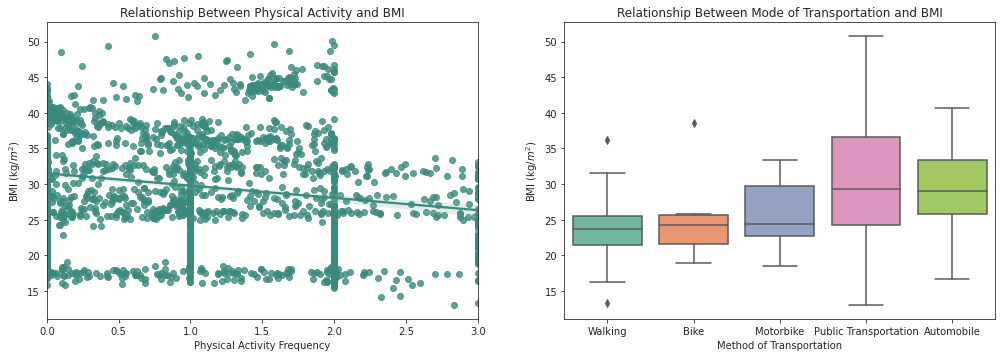

In [ ]:
#Graphs 15-16; BMI and PAF, Transporation correlation

#subplot 1: physical activity and BMI
plt.figure(figsize=(17,12))
plt.subplot(2, 2, 1)
sn.regplot(x=df.PAF, y=df.BMI, color='#3b8a7f').set_title('Relationship Between Physical Activity and BMI')
plt.xlabel("Physical Activity Frequency")
plt.ylabel("BMI (kg/$m^2$)")

#subplot 2: transportation and BMI
plt.subplot(2, 2, 2)
sn.boxplot(x = 'Transportation', y = 'BMI', data = df, order=["Walking","Bike","Motorbike","Public Transportation", "Automobile"], palette = "Set2").set_title('Relationship Between Mode of Transportation and BMI')
plt.xlabel("Method of Transportation")
plt.ylabel("BMI (kg/$m^2$)")


In [16]:
#Correlation matrix
df.corr()

,Age,Height,Weight,BMI,FCV,NMM,CW,PAF,TUT
Age,1.000000,-0.031748,0.198160,0.240769,0.013572,-0.055823,-0.044058,-0.148202,-0.302927
Height,-0.031748,1.000000,0.457468,0.124466,-0.040363,0.227806,0.220487,0.293584,0.041808
Weight,0.198160,0.457468,1.000000,0.934494,0.216574,0.092149,0.203823,-0.056490,-0.079351
BMI,0.240769,0.124466,0.934494,1.000000,0.265082,0.027936,0.144110,-0.182932,-0.105036
FCV,0.013572,-0.040363,0.216574,0.265082,1.000000,0.034885,0.081332,0.022003,-0.104128
NMM,-0.055823,0.227806,0.092149,0.027936,0.034885,1.000000,0.075335,0.127816,0.015693
CW,-0.044058,0.220487,0.203823,0.144110,0.081332,0.075335,1.000000,0.165310,0.020704
PAF,-0.148202,0.293584,-0.056490,-0.182932,0.022003,0.127816,0.165310,1.000000,0.058716
TUT,-0.302927,0.041808,-0.079351,-0.105036,-0.104128,0.015693,0.020704,0.058716,1.000000


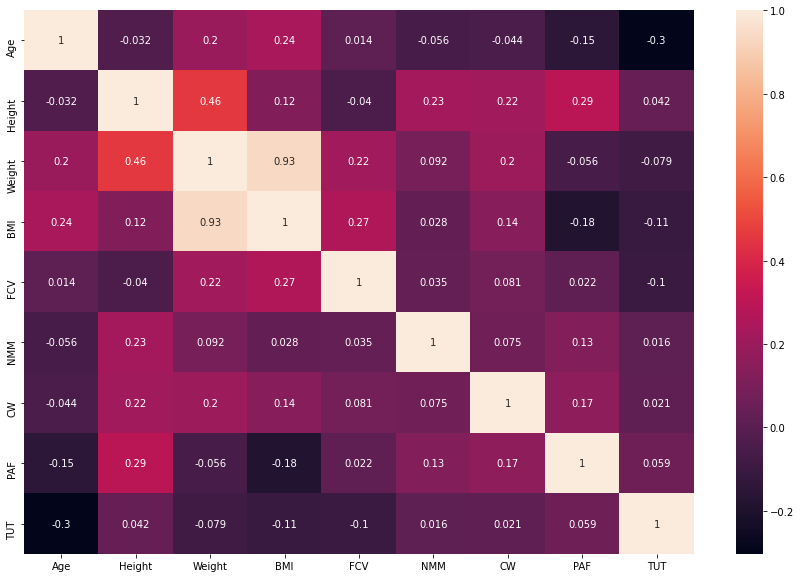

In [17]:
#Correlation heatmap
plt.figure(figsize=(15,10))
sn.heatmap(df.corr(), annot = True)